In [4]:
from app.interface import QuantumImaging
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [37]:
qi = QuantumImaging(save_dir='./data/test.h5')

In [38]:
qi.run_initialisation()

No camera settings provided. Using defaults.


True

In [39]:
qi.run_parameters([0,0,0,15.59], args=False)

0.6933636290919171

In [48]:
# qi.shutdown()
# import tables
# tables.file._open_files.close_all()
df =  h5py.File('./data/sampling_jena_good.h5', 'r')

In [49]:
run_keys = [int(x.split('_')[1]) for x in df.keys()]
run_keys
# df.close()

[0,
 1,
 10,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 8,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 9,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

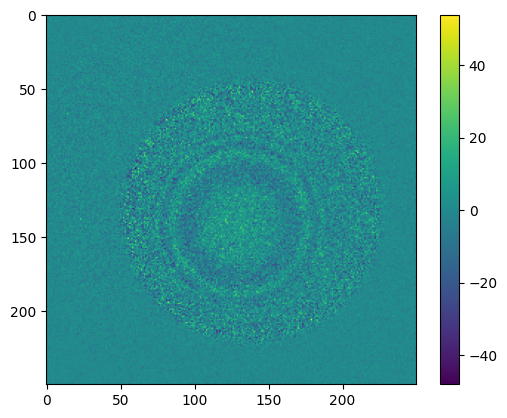

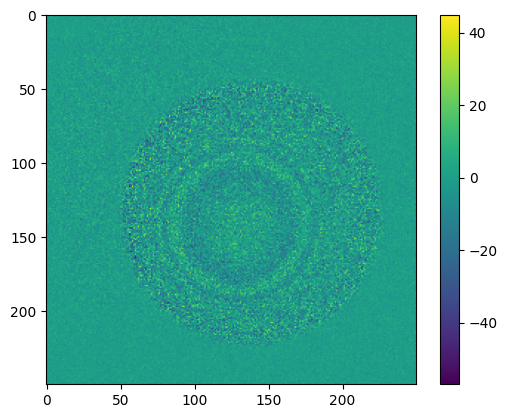

In [85]:
# for i in range(0, 100
# plt.imshow(df['run_0']['fringes'][0], vmax=200)
im_list = df['run_9']['fringes']
vis = np.std(im_list, axis=0) / df['run_0']['dark_img']

# plt.imshow(vis)
# plt.colorbar()
# plt.show()

# plt.plot(im_list[:, 120, 120])

#vis = np.max(np.abs(fft_im_list[1:]), axis = 0)

# plt.imshow(im_list[4], vmax=200)
# plt.show()

plt.imshow(im_list[3] - im_list[4])
plt.colorbar()
plt.show()

In [11]:
qi.shutdown()

In [1]:
from app.drivers import KIM101

In [2]:
sig_arm_piezo =  KIM101('/dev/ttyUSB3', 'sig_arm_piezo')
sig_arm_piezo.initialise(config_dict={})

In [8]:
sig_arm_piezo.set_parameters(0, axis=1)

In [10]:
sig_arm_piezo.shutdown()

In [9]:
sig_arm_piezo.get_position()

[0, 0]

In [5]:
from app.driver_libs.jena import NV40

In [6]:
nv =  NV40('/dev/ttyUSB7')

AttributeError: 'NV40' object has no attribute 'serial_conn'

In [46]:
nv.set_position(0)

In [47]:
nv.set_remote_control(False)

In [48]:
nv.__exit__(1,1,1)

In [1]:
from app.drivers import CameraDriver as CD
import matplotlib.pyplot as plt
from app.drivers import ZaberDriver

In [2]:
cd = CD()
cd.initialise()
cd.start_acquisition()

No camera settings provided. Using defaults.


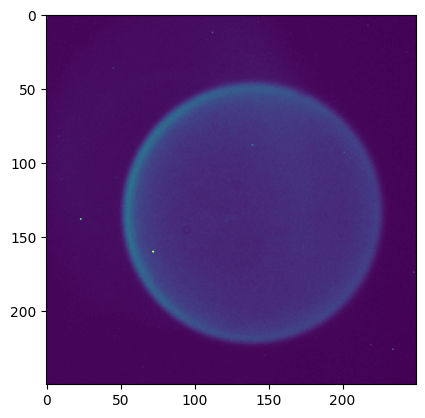

In [10]:
img = cd.get_image()
plt.imshow(img, vmax=1000)
plt.show()

In [11]:
cd.shutdown()

In [16]:
z_coarse = ZaberDriver('/dev/ttyUSB0', 'z_coarse')
z_coarse.initialise(config_dict={})

In [33]:
z_coarse.set_parameters(15.59)

In [34]:
z_coarse.shutdown()

In [12]:
from pymeasure.instruments.hcp import TC038

In [13]:
class Old_Oven(TC038):
    verbose = True
    stabilization_time_in_s = 60
    
    def change_temp(self, temp):
        self.setpoint = temp
        while True:
            Current_temp = self.temperature
            Temp_difference = np.abs(Current_temp - temp)
            if Temp_difference > 0.05:
                if self.verbose:
                    print('Current crystal temperature = {:.1f} C, but temperature setpoint = {:.1f} C'.format(Current_temp, temp))
                time.sleep(1)

            else:
                if self.verbose:
                    print('Current crystal temperature = {:.1f} C, we now reached the temperature setpoint'.format(Current_temp))
                    print('We wait a few seconds for stabilization of the temperature')
                time.sleep(self.stabilization_time_in_s)
                break

In [18]:
oven = Old_Oven('/dev/ttyUSB2')

ValueError: 'write_termination' is not a valid attribute for type Resource

In [16]:
!pip install pyvisa-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 792.0 kB/s eta 0:00:001m3.7 MB/s eta 0:00:01
